## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10.3, 8.3]

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

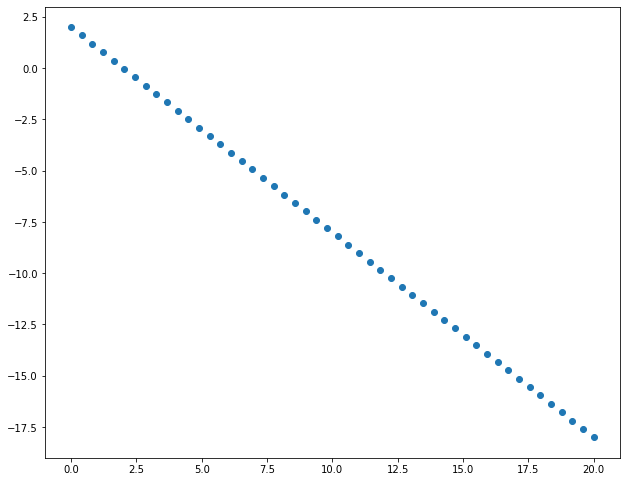

In [4]:
plt.scatter(X, y);

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def gradient_descent(features, target, lr, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1 = 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break

    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))

    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    if(grad_norm <= 0.001):
      break

    theta_0 = theta_0 - (lr * d_theta_0)
    theta_1 = theta_1 - (lr * d_theta_1)

    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
theta_0_upd, theta_1_upd, loss, preds = gradient_descent(X, y, 0.0005, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [7]:
from sklearn.metrics import r2_score

y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

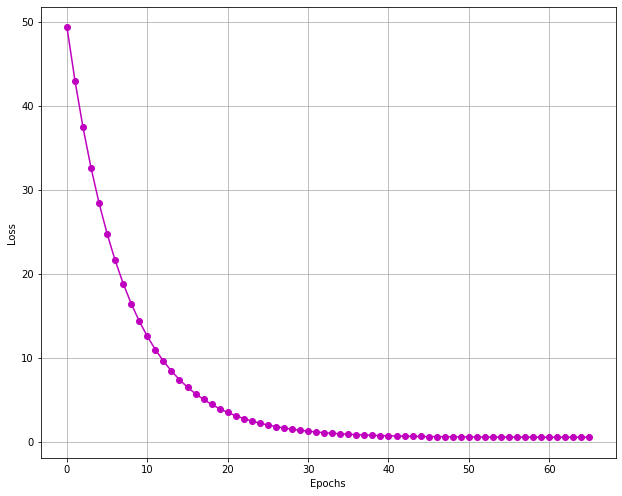

In [8]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='m');

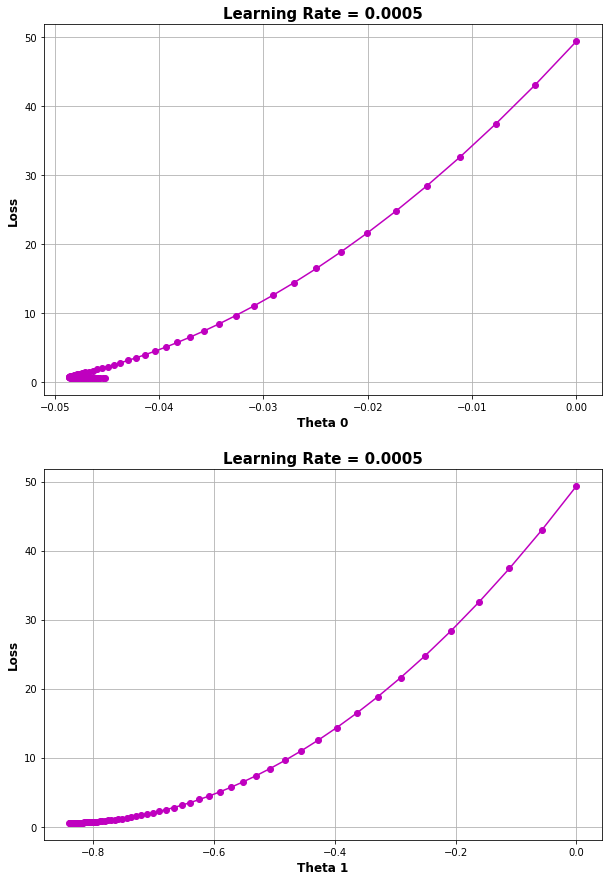

In [9]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.0005', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

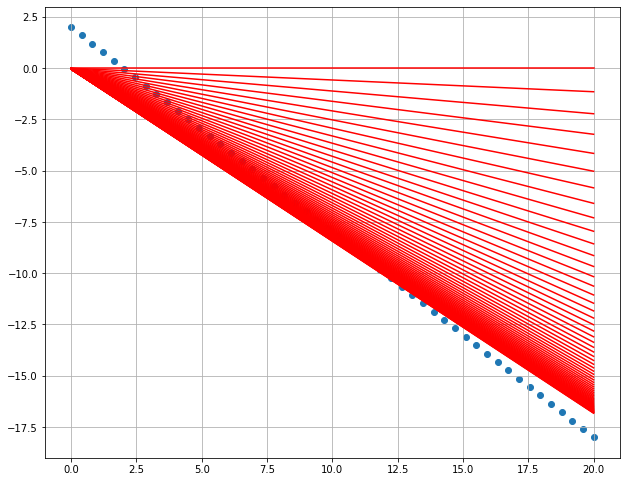

In [10]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

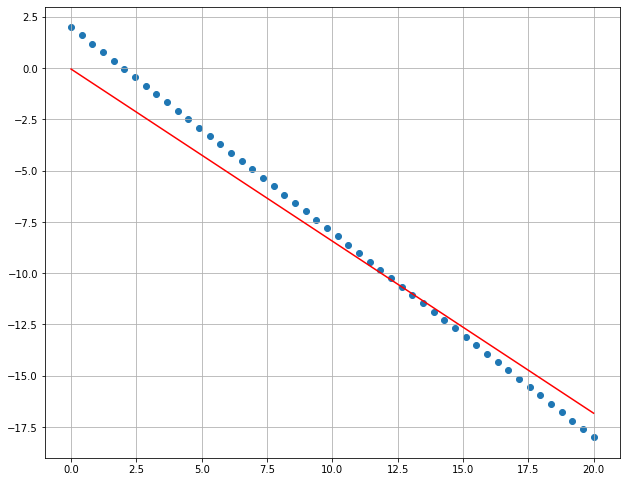

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [12]:
def momentum_gradient_descent(features, target, lr, decay_rate, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1 = 0, 0
  psum_theta_0, psum_theta_1 = 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break    


    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))

    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp

    psum_theta_0 = (psum_theta_0 * decay_rate) + (lr * d_theta_0)
    psum_theta_1 = (psum_theta_1 * decay_rate) + (lr * d_theta_1)
    

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    theta_0 = theta_0 - psum_theta_0
    theta_1 = theta_1 - psum_theta_1

    if(grad_norm <= 0.001):
      break

    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [13]:
theta_0_upd, theta_1_upd, loss, preds = momentum_gradient_descent(X, y, 0.0005, 0.5, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [14]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9687892837396442

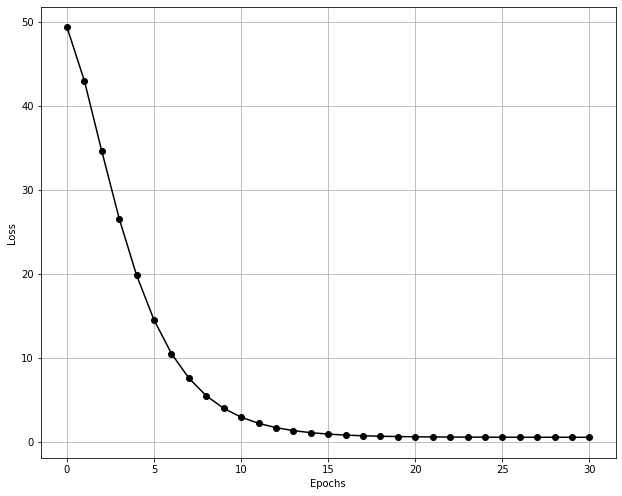

In [15]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='black');

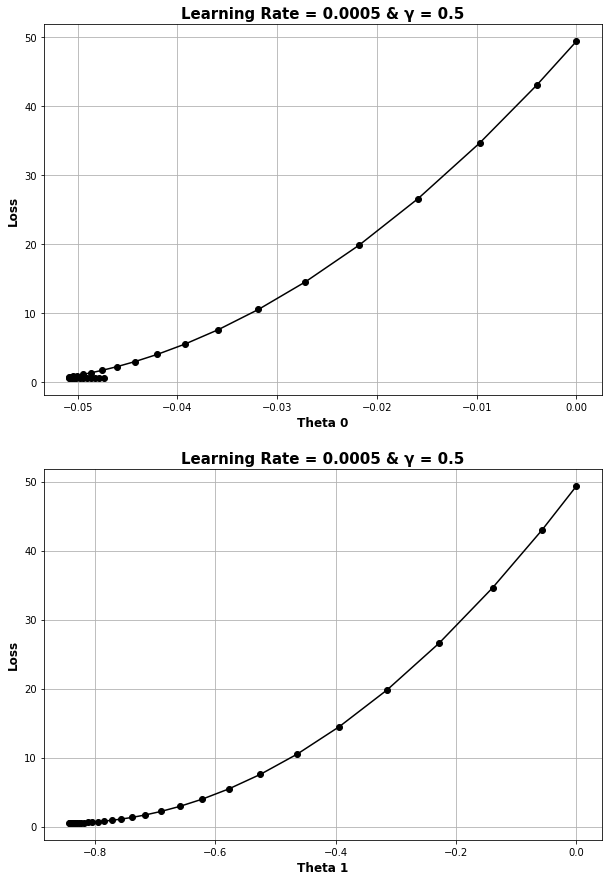

In [16]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.5', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='black')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.5', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='black');

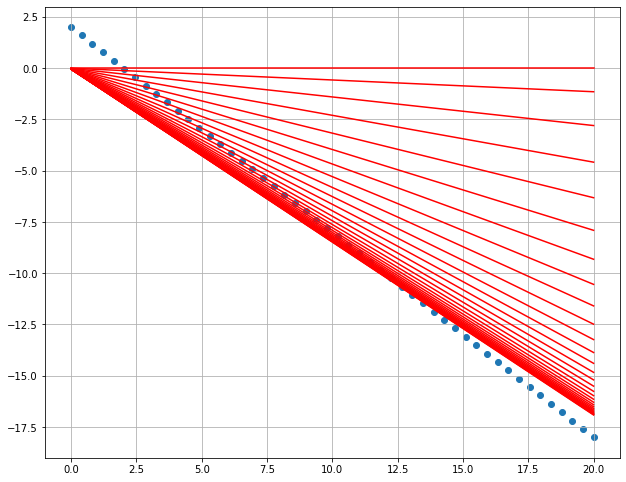

In [17]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

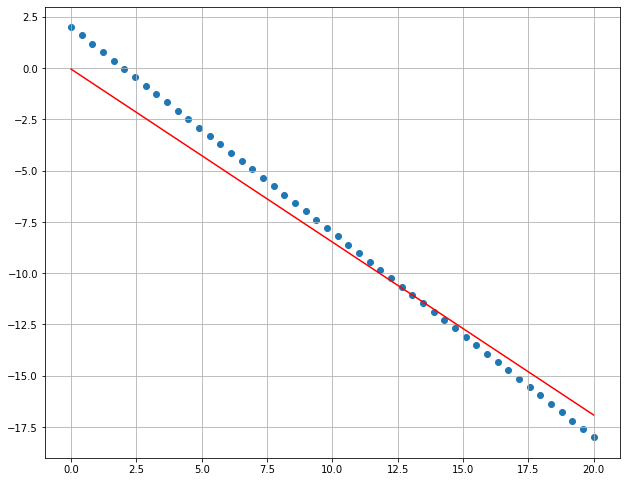

In [18]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [19]:
theta_0_upd, theta_1_upd, loss, preds = momentum_gradient_descent(X, y, 0.0005, 0, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [20]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9686158031920962

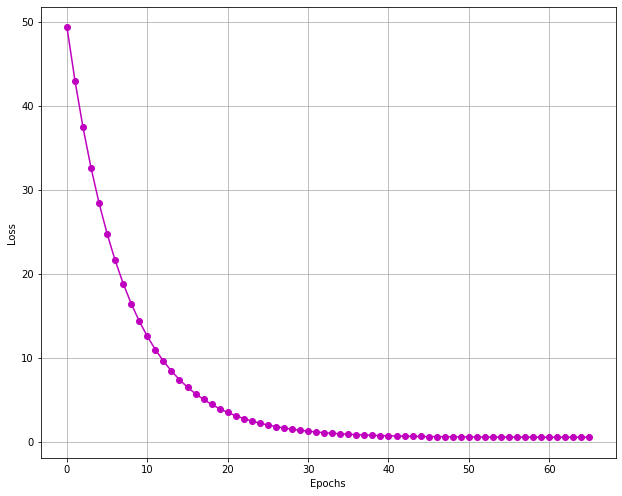

In [21]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='m');

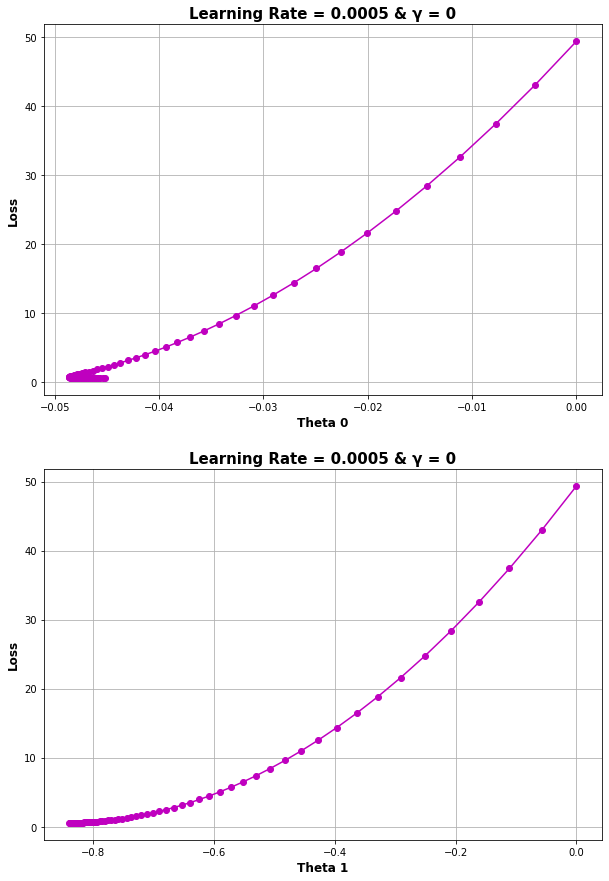

In [22]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.0005 & γ = 0', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

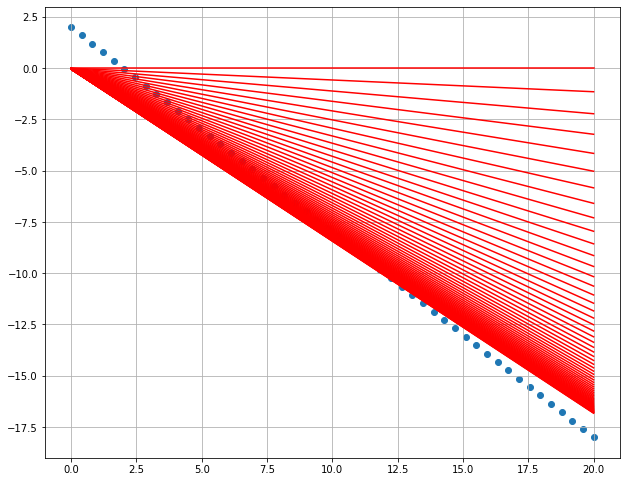

In [23]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

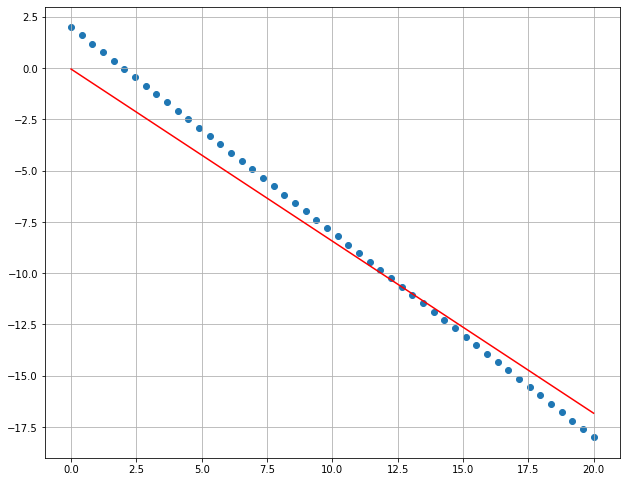

In [24]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

In [25]:
theta_0_upd, theta_1_upd, loss, preds = momentum_gradient_descent(X, y, 0.0005, 1, 300)

Streaming output truncated to the last 5000 lines.
h(x):[ 2.54656353e+00  2.12035632e+00  1.69414910e+00  1.26794188e+00
  8.41734663e-01  4.15527446e-01 -1.06797713e-02 -4.36886989e-01
 -8.63094206e-01 -1.28930142e+00 -1.71550864e+00 -2.14171586e+00
 -2.56792308e+00 -2.99413029e+00 -3.42033751e+00 -3.84654473e+00
 -4.27275194e+00 -4.69895916e+00 -5.12516638e+00 -5.55137360e+00
 -5.97758081e+00 -6.40378803e+00 -6.82999525e+00 -7.25620247e+00
 -7.68240968e+00 -8.10861690e+00 -8.53482412e+00 -8.96103134e+00
 -9.38723855e+00 -9.81344577e+00 -1.02396530e+01 -1.06658602e+01
 -1.10920674e+01 -1.15182746e+01 -1.19444819e+01 -1.23706891e+01
 -1.27968963e+01 -1.32231035e+01 -1.36493107e+01 -1.40755179e+01
 -1.45017252e+01 -1.49279324e+01 -1.53541396e+01 -1.57803468e+01
 -1.62065540e+01 -1.66327612e+01 -1.70589685e+01 -1.74851757e+01
 -1.79113829e+01 -1.83375901e+01]

Error Vector: 
[ 0.54656353  0.52851958  0.51047563  0.49243168  0.47438772  0.45634377
  0.43829982  0.42025587  0.40221192  0.3

In [26]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

-1.4979771915880793

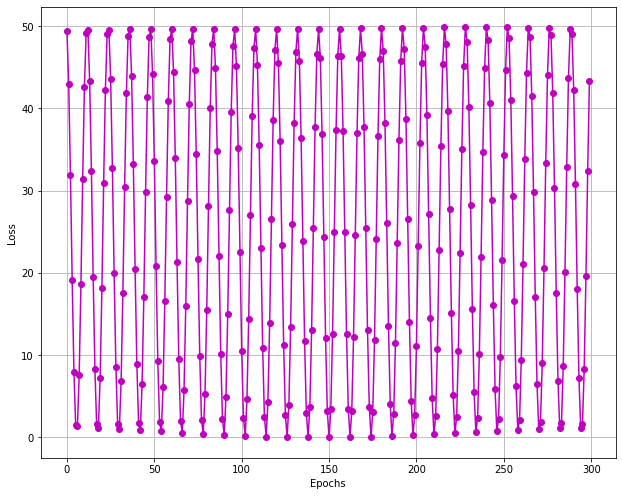

In [27]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='m');

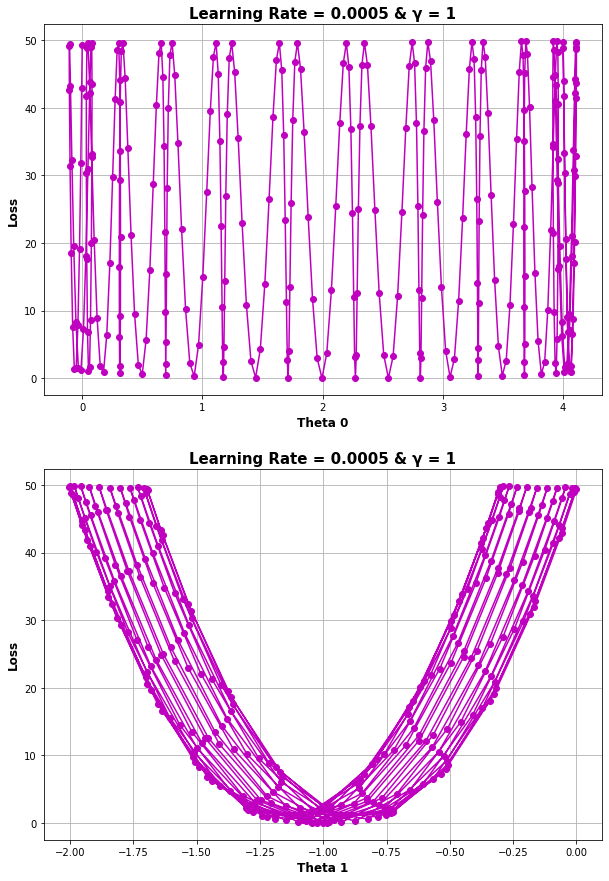

In [28]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 1', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.0005 & γ = 1', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='m');

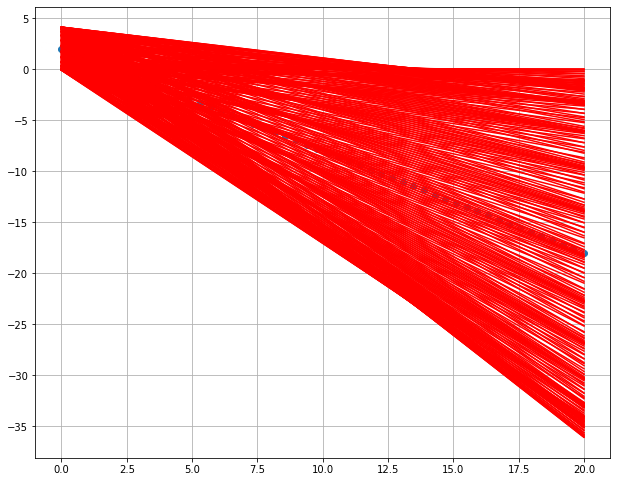

In [29]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

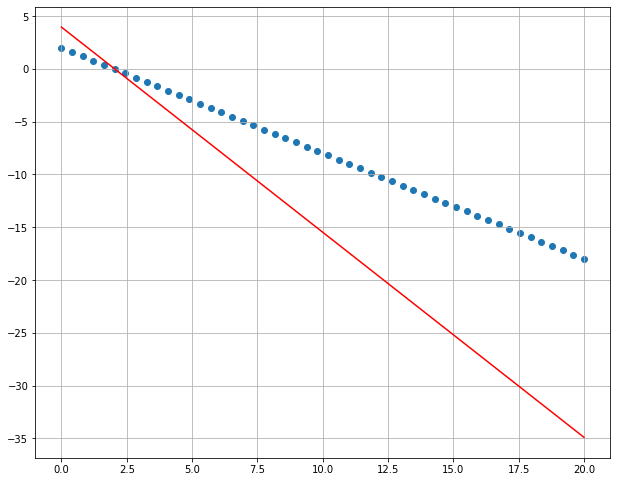

In [30]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [31]:
theta_0_upd, theta_1_upd, loss, preds = momentum_gradient_descent(X, y, 0.0005, 0.9, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [32]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.973589591111118

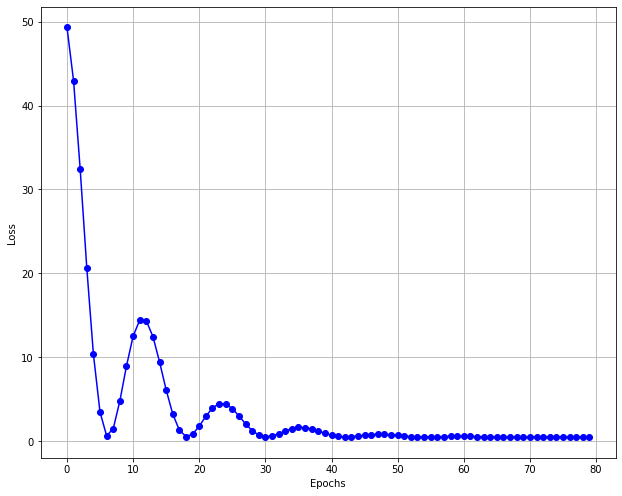

In [33]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

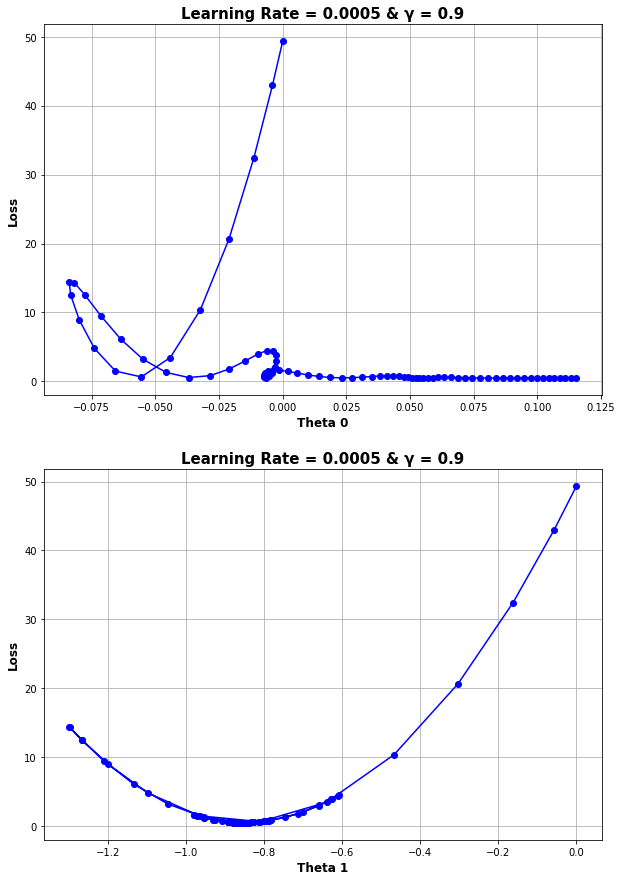

In [34]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

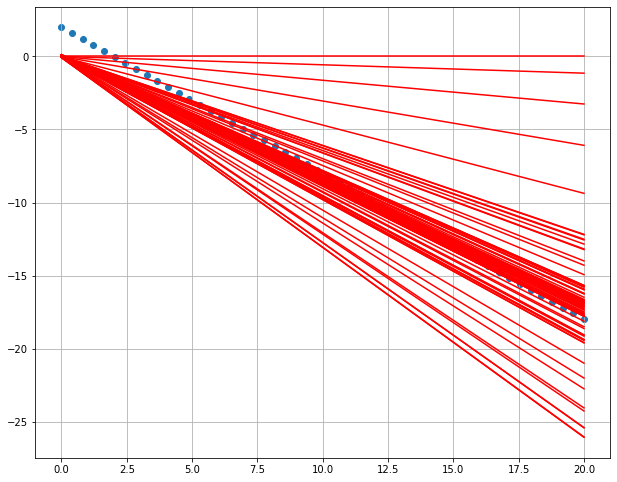

In [35]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

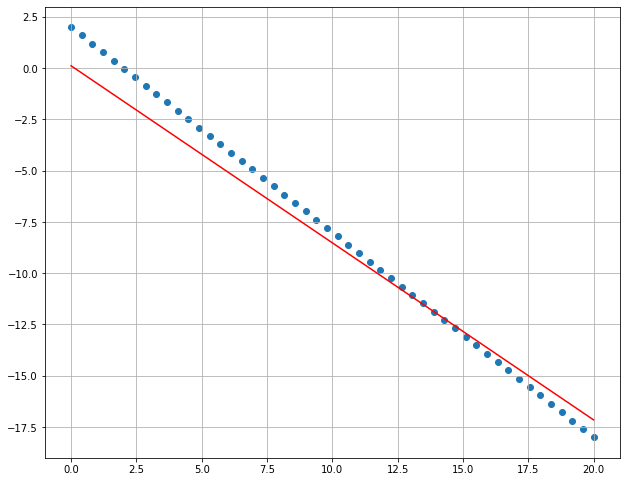

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [37]:
theta_0_upd, theta_1_upd, loss, preds = momentum_gradient_descent(X, y, 0.0005, 0.89, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

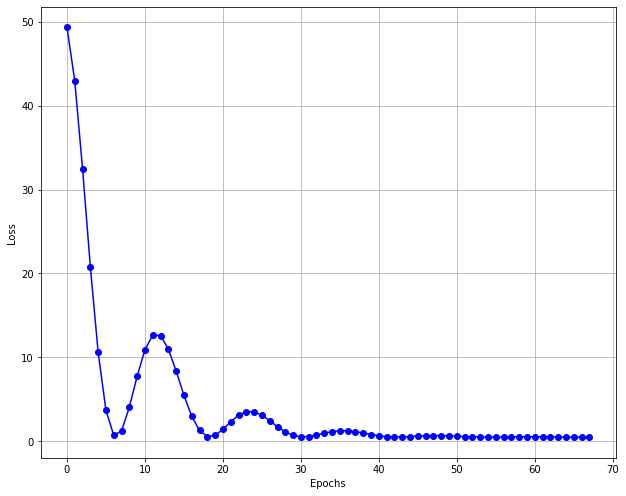

In [38]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

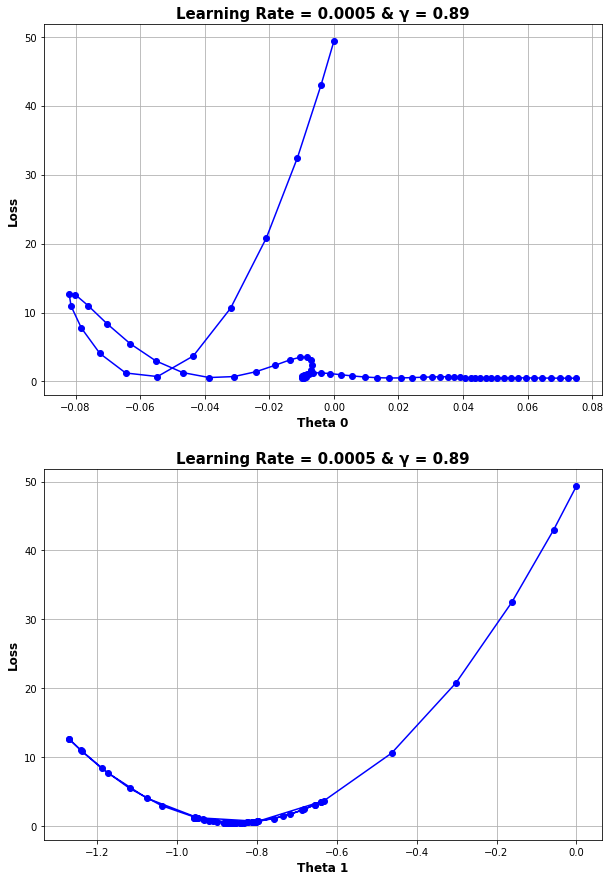

In [39]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.89', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.89', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

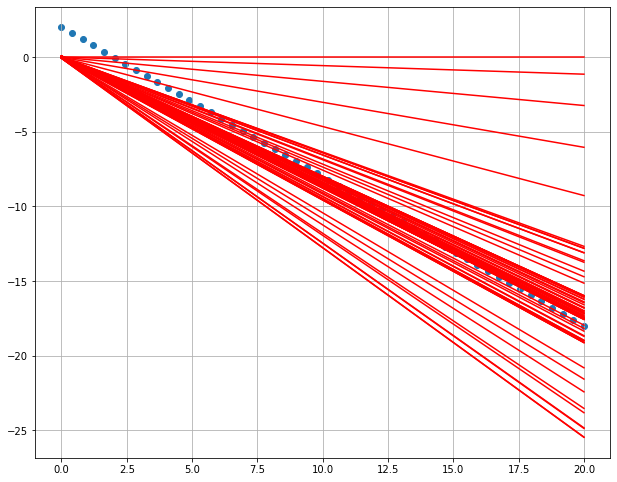

In [40]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

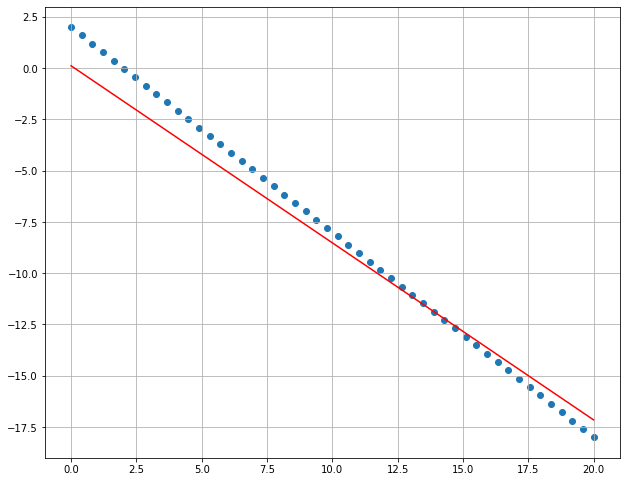

In [41]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

In [42]:
def nag_gradient_descent(features, target, lr, decay_rate, max_iter):

  theta_0_upd, theta_1_upd, loss, preds = ([] for i in range(4))

  n_samp = len(features)

  theta_0, theta_1  = 0, 0
  psum_theta_0, psum_theta_1 = 0, 0

  for i in range(max_iter):

    if( i > 2 and abs(loss[-2]-loss[-1]) < 0.001):
      break

    print('\n')
    print('*'*18 + ' Iteration ' + str(i) + ' ' + '*'*20 )
    print('\n')

    theta_0_upd.append(theta_0)
    theta_1_upd.append(theta_1)

    h_x = theta_0 + (features * theta_1)

    preds.append(h_x)

    print('h(x):{}'.format(h_x))

    err = h_x - target
    cost = (err@err) / (2*n_samp)

    loss.append(cost)

    print('\nError Vector: \n{}\n\n j = {}\n'.format(err, cost))


    theta_temp_0 = theta_0 - (psum_theta_0 * decay_rate)
    theta_temp_1 = theta_1 - (psum_theta_1 * decay_rate)

    h_x_temp = theta_temp_0 + (features * theta_temp_1)
    err_temp = h_x_temp - target

    d_theta_0_temp = (err_temp.sum()) / n_samp
    d_theta_1_temp = (err_temp @ features) / n_samp



    d_theta_0 = (err.sum()) / n_samp
    d_theta_1 = (err @ features) / n_samp


    psum_theta_0 = (psum_theta_0 * decay_rate) + (lr * d_theta_0_temp)
    psum_theta_1 = (psum_theta_1 * decay_rate) + (lr * d_theta_1_temp)

    grad_vec = np.asarray([d_theta_0, d_theta_1])

    print('\nGradient Vector :', grad_vec)

    grad_norm = np.linalg.norm(grad_vec)

    print('\nGradient Vector Norm:', grad_norm)

    if(grad_norm <= 0.001):
      break

    theta_0 = theta_temp_0 - (lr * d_theta_0_temp)
    theta_1 = theta_temp_1 - (lr * d_theta_1_temp)

    print('\ntheta_0_new : {}\ntheta_1_new : {}'.format(theta_0, theta_1))
  
  return theta_0_upd, theta_1_upd, loss, preds


##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [43]:
theta_0_upd, theta_1_upd, loss, preds = nag_gradient_descent(X, y, 0.0005, 0.9, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [44]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.971103130756324

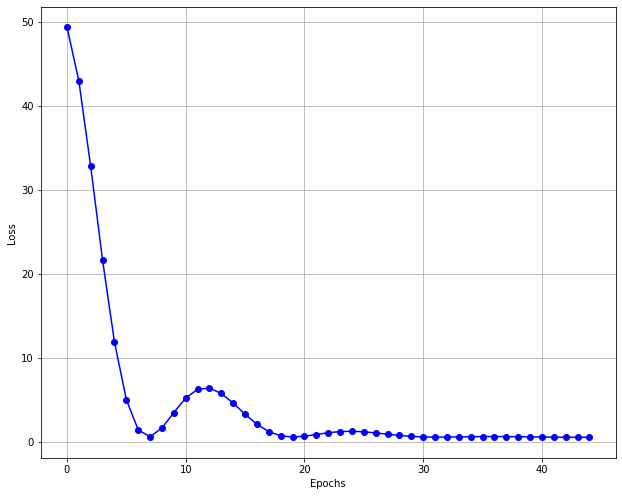

In [45]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

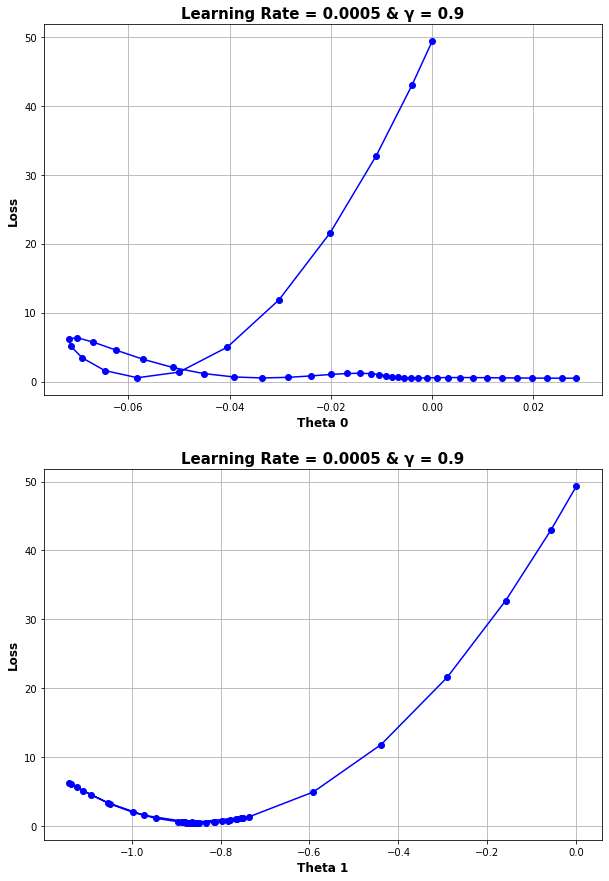

In [46]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.9', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

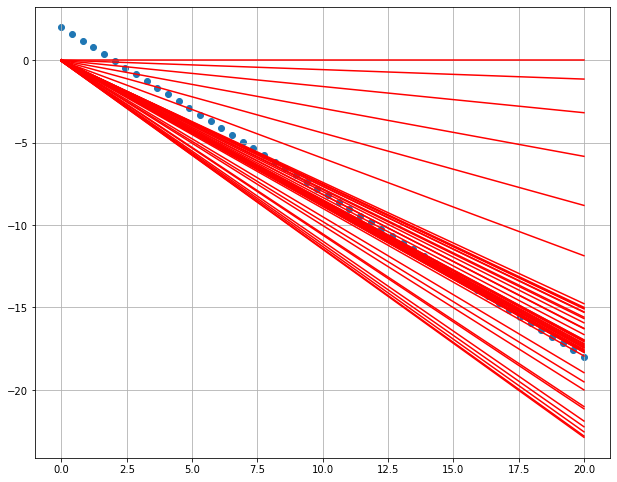

In [47]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

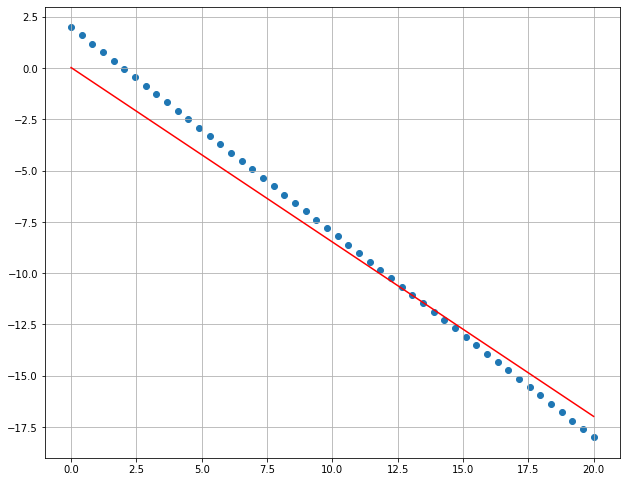

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [49]:
theta_0_upd, theta_1_upd, loss, preds = nag_gradient_descent(X, y, 0.0005, 0.89, 300)



****************** Iteration 0 ********************


h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

 j = 49.34693877551021


Gradient Vector : [  8.         114.69387755]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573469

In [50]:
y_pred = theta_0_upd[-1] +  (X * theta_1_upd[-1])
r2_score(y, y_pred)

0.9699718983158406

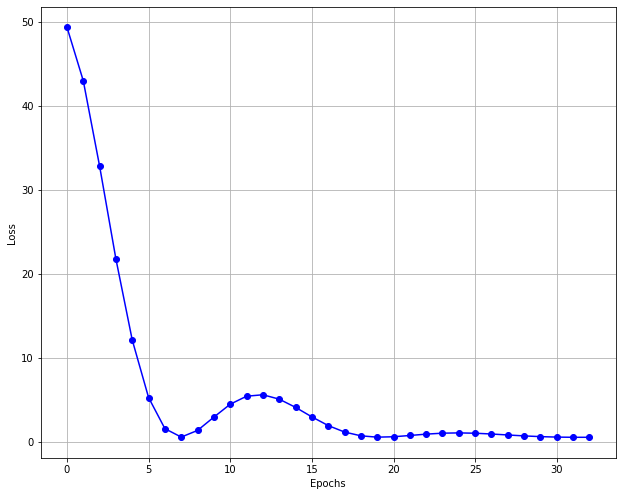

In [51]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

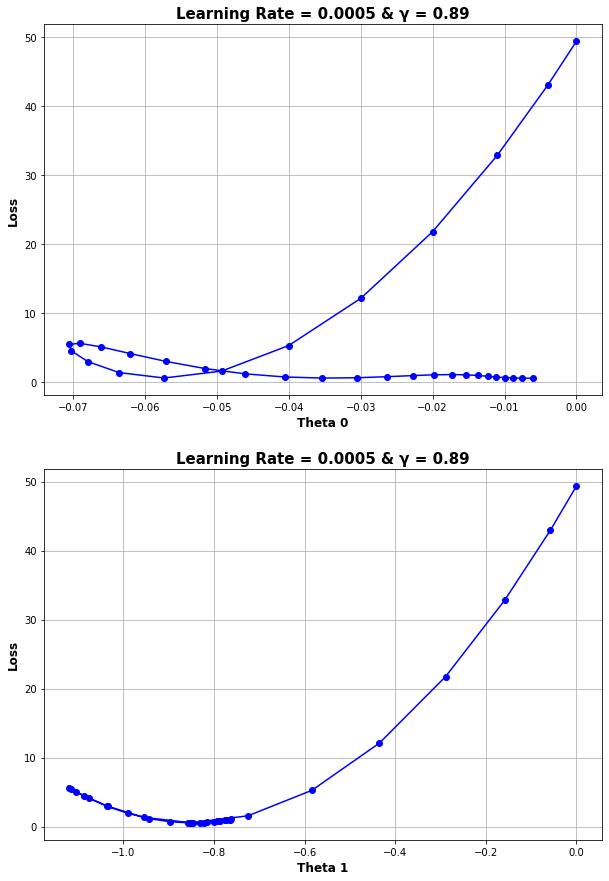

In [52]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.0005 & γ = 0.89', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(theta_0_upd, loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.0005 & γ = 0.89', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(theta_1_upd, loss, marker = 'o', color='b');

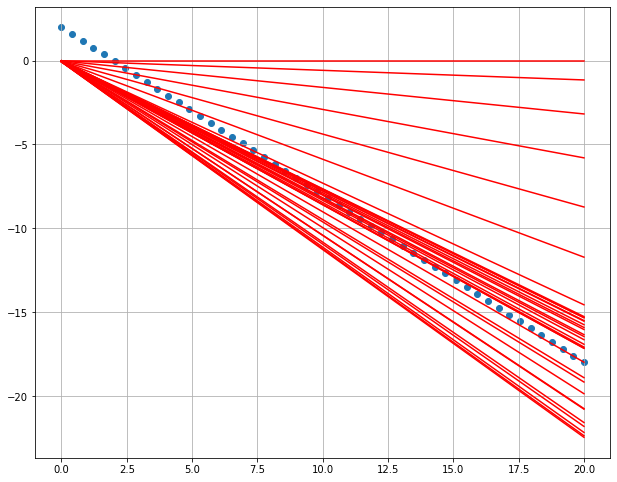

In [53]:
plt.scatter(X, y)
plt.grid()

for y_hat in preds:
  plt.plot(X, y_hat, color='r');

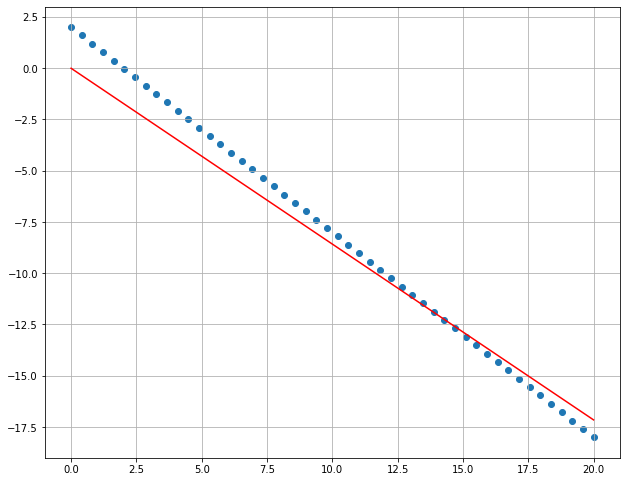

In [54]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r');
plt.grid()